### Predicting Nigerian House Prices Using ML

**Project Description:**
Exploring the Nigerian house dataset. In this project, we will be performing
Data cleaning,Explorative Data Analysis,buiding a model to predict the price of a house based on the feature in the dataset

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

### Import Dataset

In [2]:
df=pd.read_csv('nigeria_houses_data.csv')

df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


### Understanding the dataset

In [3]:
# check the shape
df.shape

(24326, 8)

* The Dataset contains 24,326 records and 8 features

In [4]:
# descriptive stat

df.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,24326.000000,24326.000000,24326.000000,24326.000000,2.432600e+04
mean,4.338814,4.600798,5.176355,4.041725,3.013802e+08
std,1.138497,1.163161,1.226253,1.399936,1.220403e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,4.000000,4.000000,5.000000,4.000000,5.200000e+07
50%,4.000000,5.000000,5.000000,4.000000,8.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


In [5]:
# info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


* There is no missing values and all features are in the appropriate type

In [6]:
# Check for correlation

df.corr()

,bedrooms,bathrooms,toilets,parking_space,price
bedrooms,1.000000,0.726557,0.610501,0.158528,0.025734
bathrooms,0.726557,1.000000,0.719102,0.174129,0.021965
toilets,0.610501,0.719102,1.000000,0.225345,0.015486
parking_space,0.158528,0.174129,0.225345,1.000000,0.018370
price,0.025734,0.021965,0.015486,0.018370,1.000000


<AxesSubplot:>

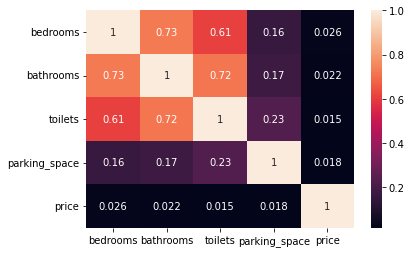

In [7]:
# Visualize the correlation

sns.heatmap(df.corr(),annot=True)

**Total Number of Propertise

In [8]:
len(df)

24326

**titles of properties**

In [9]:
df['title'].unique()

array(['Detached Duplex', 'Terraced Duplexes', 'Semi Detached Duplex',
       'Detached Bungalow', 'Block of Flats', 'Semi Detached Bungalow',
       'Terraced Bungalow'], dtype=object)

In [10]:
for t in df['title'].unique():
    print(f'* {t}')
    
# print lenght
print(f"\nThere are {len(df['title'].unique())} unique titles.")

* Detached Duplex
* Terraced Duplexes
* Semi Detached Duplex
* Detached Bungalow
* Block of Flats
* Semi Detached Bungalow
* Terraced Bungalow

There are 7 unique titles.


**Unique State of Propertise**

In [11]:
for s in df['state'].unique():
    print(f'* {s}')
    
# print lenght
print(f"\nThere are {len(df['state'].unique())} unique states.")

* Abuja
* Lagos
* Edo
* Ogun
* Oyo
* Imo
* Anambara
* Rivers
* Enugu
* Kaduna
* Kwara
* Nasarawa
* Abia
* Delta
* Akwa Ibom
* Osun
* Ekiti
* Cross River
* Kogi
* Plateau
* Kano
* Katsina
* Bayelsa
* Borno
* Niger

There are 25 unique states.


**Unique town**

In [12]:
for t in df['town'].unique():
    print(f'* {t}')
    
# print lenght
print(f"\nThere are {len(df['town'].unique())} unique town.")

* Mabushi
* Katampe
* Lekki
* Ajah
* Epe
* Lokogoma District
* Oredo
* Victoria Island (VI)
* Mowe Ofada
* Ikeja
* Ikoyi
* Magodo
* Kaura
* Galadimawa
* Gwarinpa
* Abeokuta North
* Lugbe District
* Ibeju Lekki
* Yaba
* Sango Ota
* Ifako-Ijaiye
* Agege
* Ikorodu
* Jahi
* Ibadan
* Orozo
* Ifo
* Owerri North
* Guzape District
* Idu Industrial
* Owerri Municipal
* Isheri North
* Utako
* Port Harcourt
* Kuje
* Isheri
* Life Camp
* Ipaja
* Ado-Odo/Ota
* Dape
* Mushin
* Ejigbo
* Isolo
* Ojodu
* Gaduwa
* Enugu
* Dakwo
* Asokoro District
* Alimosho
* Sagamu
* Chikun
* Egbeda
* Wuye
* Kubwa
* Shomolu
* Ogudu
* Owerri West
* Ibafo
* Surulere
* Obio-Akpor
* Ayobo
* Apo
* Mowe Town
* Ibadan South-West
* Wuse 2
* Durumi
* Simawa
* Arepo
* Ikotun
* Oluyole
* Maitama District
* Maryland
* Ido
* Karsana
* Wuse
* Ilorin West
* Kurudu
* Karmo
* Abeokuta South
* KM 46
* Gbagada
* Idimu
* Kaduna South
* Magboro
* Gudu
* Kukwaba
* Mbora (Nbora)
* Obafemi Owode
* Jabi
* Karu
* Ojo
* Garki
* Aba
* Ogijo
* Asa

### Univariant Analsis

**Distribution of prices**

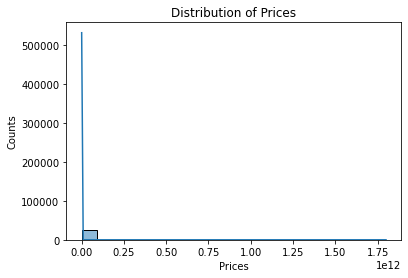

In [13]:
sns.histplot(df["price"], bins=20, kde=True)
plt.title("Distribution of Prices")
plt.xlabel("Prices")
plt.ylabel("Counts")
plt.show()

### other EDA(Bivalent Analysis)
1. avg price by state
2. avg prie by town
3. count of houses by state
4. count of houses by state
5. avg price by title

### Model Buiding

* Import model
* Split data(test/Train)
* Train Model
* Predict using model

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder # for label encoding

In [38]:
# create an object(using onehotencoder)
he= OneHotEncoder()

In [36]:
he.fit(df)

OneHotEncoder()

In [39]:
new_df = pd.get_dummies(df, columns=['title','town','state'])

new_df.head()

,bedrooms,bathrooms,toilets,parking_space,price,title_Block of Flats,title_Detached Bungalow,title_Detached Duplex,title_Semi Detached Bungalow,title_Semi Detached Duplex,...,state_Kogi,state_Kwara,state_Lagos,state_Nasarawa,state_Niger,state_Ogun,state_Osun,state_Oyo,state_Plateau,state_Rivers
0,6.0,5.0,5.0,4.0,450000000.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,5.0,5.0,4.0,800000000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,5.0,5.0,4.0,120000000.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4.0,4.0,5.0,6.0,40000000.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,4.0,4.0,5.0,2.0,75000000.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [15]:
# split data into dependent and independent feature

# X = df[["bedrooms","bathrooms","toilets","parking_space"]]
# X.head()

,bedrooms,bathrooms,toilets,parking_space
0,6.0,5.0,5.0,4.0
1,4.0,5.0,5.0,4.0
2,4.0,5.0,5.0,4.0
3,4.0,4.0,5.0,6.0
4,4.0,4.0,5.0,2.0


In [16]:
# y=df["price"]
# y.head()

0    450000000.0
1    800000000.0
2    120000000.0
3     40000000.0
4     75000000.0
Name: price, dtype: float64

#### Train Test Split

In [17]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
# X_train.shape

(19460, 4)

In [19]:
# y_train.shape

(19460,)

In [20]:
# X_test.shape

(4866, 4)

In [21]:
y_test.shape

(4866,)

### Train the Model

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(X_train, y_train) # imput the data into the model


LinearRegression()

In [24]:
# to see the slope
print(f"Intercept {lm.intercept_}")

Intercept -201408517.40847945


In [25]:
print(f"Coefficient {lm.coef_}")

Coefficient [ 1.40257301e+08  1.42158524e+08 -1.74139773e+08  1.14459260e+07]


In [26]:
coef_df = pd.DataFrame(lm.coef_, X.columns, columns = ["coefficient"])

coef_df

,coefficient
bedrooms,1.402573e+08
bathrooms,1.421585e+08
toilets,-1.741398e+08
parking_space,1.144593e+07


### Prediction

In [27]:
y_pred = lm.predict(X_test)

y_pred

array([2.23061603e+08, 3.09460646e+08, 2.11615677e+08, ...,
       2.45498148e+08, 1.07470965e+09, 2.45498148e+08])

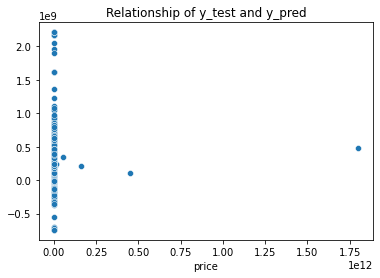

In [28]:
# compare the y_pred and y_test

sns.scatterplot(x=y_test, y=y_pred)
plt.title("Relationship of y_test and y_pred")
plt.show()

### Model Evaluation

In [29]:
from sklearn import metrics

In [30]:
print(f"Mean Absolute Error {metrics.mean_absolute_error(y_test, y_pred)}.")

Mean Absolute Error 678863315.1593857.


In [31]:
print(f"Mean Square Error {metrics.mean_squared_error(y_test, y_pred)}.")

Mean Square Error 7.131432474670825e+20.


In [32]:
# bed=5,bath 6, toilet =5,packing_space =6

lm.predict([[5,6,5,6]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.50805825e+08])

### encoding

In [42]:
X= new_df.drop(columns=['price'])
               
X.head()
               

,bedrooms,bathrooms,toilets,parking_space,title_Block of Flats,title_Detached Bungalow,title_Detached Duplex,title_Semi Detached Bungalow,title_Semi Detached Duplex,title_Terraced Bungalow,...,state_Kogi,state_Kwara,state_Lagos,state_Nasarawa,state_Niger,state_Ogun,state_Osun,state_Oyo,state_Plateau,state_Rivers
0,6.0,5.0,5.0,4.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,5.0,5.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,5.0,5.0,4.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4.0,4.0,5.0,6.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,4.0,4.0,5.0,2.0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [43]:
y= new_df['price']

y.head()

0    450000000.0
1    800000000.0
2    120000000.0
3     40000000.0
4     75000000.0
Name: price, dtype: float64

### test train 

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
 X_train.shape

(19460, 225)

In [46]:
 y_train.shape

(19460,)

In [47]:
X_test.shape

(4866, 225)

In [48]:
y_test.shape

(4866,)

In [49]:
lm = LinearRegression()

In [50]:
lm.fit(X_train, y_train)

LinearRegression()

In [51]:
print(f"Intercept {lm.intercept_}")

Intercept 6.846213959115893e+18


In [52]:
print(f"Coefficient {lm.coef_}")

Coefficient [ 2.04122278e+08 -4.24276905e+05  1.06308233e+08  1.60671116e+08
 -6.78812315e+18 -6.78812315e+18 -6.78812315e+18 -6.78812315e+18
 -6.78812315e+18 -6.78812315e+18 -6.78812315e+18  1.21149578e+16
 -1.31761120e+16 -1.31761125e+16 -2.03851278e+16 -8.46907059e+16
 -1.31761123e+16 -1.31761120e+16 -1.31761123e+16 -1.31761117e+16
 -1.31761122e+16 -1.31761120e+16 -1.31761119e+16 -1.31761121e+16
 -1.31761122e+16 -1.31761123e+16 -2.03851277e+16 -1.31761118e+16
 -1.31761121e+16 -1.31761123e+16 -2.03851276e+16 -1.31761117e+16
 -1.31761120e+16 -1.31761122e+16 -1.31761120e+16 -2.49678882e+16
 -1.31761117e+16 -2.27217391e+15 -1.31761116e+16 -1.31761121e+16
 -2.48219696e+16 -1.31761118e+16 -1.31761118e+16 -3.81362347e+16
 -1.31761120e+16 -1.31761123e+16 -1.31761119e+16 -1.31761116e+16
 -7.11551176e+16 -1.31761121e+16 -1.31761115e+16 -3.53088574e+16
 -1.31761124e+16 -2.88230888e+12 -1.31761118e+16 -1.31761124e+16
 -4.30702778e+16 -1.31761116e+16 -2.03851281e+16 -1.31761118e+16
 -1.31761122e

In [53]:
coef_df = pd.DataFrame(lm.coef_, X.columns, columns = ["coefficient"])

coef_df

,coefficient
bedrooms,2.041223e+08
bathrooms,-4.242769e+05
toilets,1.063082e+08
parking_space,1.606711e+08
title_Block of Flats,-6.788123e+18
...,...
state_Ogun,-4.491469e+16
state_Osun,1.306431e+16
state_Oyo,-4.491469e+16
state_Plateau,-5.525014e+16


In [54]:
y_pred = lm.predict(X_test)

y_pred

array([ 5.89402112e+08,  2.68060672e+08,  9.74100480e+07, ...,
       -4.23690240e+07, -1.24477440e+07,  5.34616064e+08])

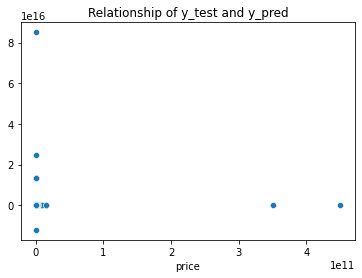

In [55]:
# compare the y_pred and y_test

sns.scatterplot(x=y_test, y=y_pred)
plt.title("Relationship of y_test and y_pred")
plt.show()

In [56]:
from sklearn import metrics

In [57]:
print(f"Mean Absolute Error {metrics.mean_absolute_error(y_test, y_pred)}.")

Mean Absolute Error 35911623934693.7.


In [58]:
print(f"Mean Square Error {metrics.mean_squared_error(y_test, y_pred)}.")

Mean Square Error 1.7862550952806088e+30.


In [60]:
lm.predict(X_test)

array([ 5.89402112e+08,  2.68060672e+08,  9.74100480e+07, ...,
       -4.23690240e+07, -1.24477440e+07,  5.34616064e+08])

### KNN (K-nearest neighbors)/ other models

In [64]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
models = {"Linear Regression": LinearRegression(),
          "Decision Tree Regression": DecisionTreeRegressor(),
          "Random Forest Regression": RandomForestRegressor(),
          "Gradient Boosting Regression": GradientBoostingRegressor(),
          "KNN Regression": KNeighborsRegressor()
    
}


for name, model in models.items():
    model.fit(X_train, y_train) # Train model
    y_pred = model.predict(X_test) # make prediction
    
    # calculate MSE
    
    mse= mean_squared_error(y_test, y_pred)
    
    # calculate R2 score
    
    r2 = r2_score(y_test,y_pred)
    
    print(f"{name}: ")
    print(f"MSE:{mse:4f}")
    print(f"R2 Score: {r2:.4f}")
    print("-*-*-*-*-*-*-*-*-*-*-")

Linear Regression: 
MSE:1786255095280608801191903625216.000000
R2 Score: -26679112440.8497
-*-*-*-*-*-*-*-*-*-*-
Decision Tree Regression: 
MSE:66906608278946734080.000000
R2 Score: 0.0007
-*-*-*-*-*-*-*-*-*-*-
Random Forest Regression: 
MSE:68134233108824530944.000000
R2 Score: -0.0176
-*-*-*-*-*-*-*-*-*-*-
Gradient Boosting Regression: 
MSE:70338202251978244096.000000
R2 Score: -0.0506
-*-*-*-*-*-*-*-*-*-*-
KNN Regression: 
MSE:93680076634861322240.000000
R2 Score: -0.3992
-*-*-*-*-*-*-*-*-*-*-


### Saving Model

In [66]:
import joblib

In [67]:
# dump model in a file
joblib.dump(lm, 'model.pk')

['model.pk']